In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [52]:
A = 0
B = 5
N = 100
EPS = 1.7*10e-2
func1 = lambda x : x + 10.2*np.cos(x) - np.sin(x)
def f(x):
    tmp = np.random.normal(0, EPS)
    return func1(x)  + tmp *10

In [53]:
x = np.linspace(A,B,N)
x

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [54]:
y = list(map(f, x))
y

[12.24167535939453,
 12.215635211958212,
 8.372741176334284,
 10.111206367131285,
 11.72692582923929,
 13.11234534375263,
 8.944926613473537,
 8.773932863642877,
 7.516053947317927,
 7.988581638572721,
 9.272227616910008,
 7.907882174024131,
 8.33061496400997,
 9.323895216984031,
 7.564727015063114,
 5.735867989798676,
 6.967278781469306,
 7.3193739122392305,
 6.593510178125566,
 1.925991573611019,
 5.7234635273582155,
 5.857856954530571,
 4.140819073594555,
 2.134828670801382,
 2.396442986942936,
 4.496583283095637,
 6.185108628291705,
 5.7450543857279746,
 5.302082137592155,
 4.042618015920008,
 -3.2657849309453497,
 1.7816882282137352,
 0.36991100310938735,
 -1.8254400085031728,
 0.3588959507458649,
 -2.4458079126708605,
 0.8305871494053494,
 -2.0154651302444626,
 -3.0790335447370865,
 -2.51708687004629,
 -4.05399299716936,
 -3.5046329170357056,
 -3.277578252584857,
 -7.643155657179597,
 -5.499924727719635,
 -2.0849889663513688,
 -5.2005684271931285,
 -7.724026472694835,
 -6.3267063

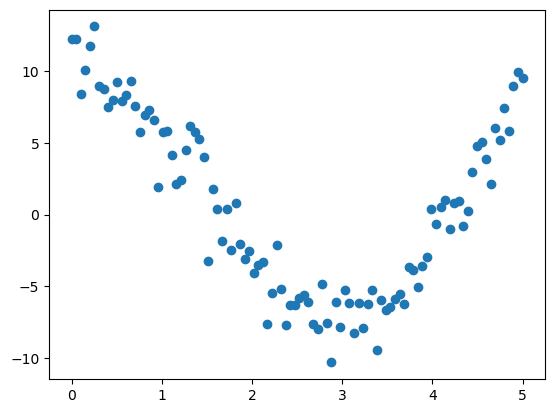

In [55]:
plt.scatter(x,y)

In [75]:

def lstsq(A, y):
    
    return np.linalg.pinv(A.T @ A) @ A.T @ y

def polyfit_custom(x, y, deg):
    # Ensure x and y have the same length
    if len(x) != len(y):
        raise ValueError("Input arrays x and y must have the same length")

    # Create the Vandermonde matrix
    A = np.vander(x, deg + 1)

    # Solve the linear system of equations
    coefficients = lstsq(A, y)
    
    return coefficients


In [76]:
pf = polyfit_custom(x,y,4)
pf

array([-0.20445445,  2.67382836, -8.51272381,  1.13916006, 10.46820088])

In [77]:
def poly_from_fit(numbers,x):
    t =  x**(len(numbers) - 1)

    if x == 0:
        return numbers[-1]
    if len(numbers)>0:
        answer = []
        for i in range(len(numbers)):
            
            answer.append(t*numbers[i])
            t /= x
        return np.sum(answer)
    else:
        return numbers
            

In [78]:
answer_poly = [poly_from_fit(pf,i) for i in x]


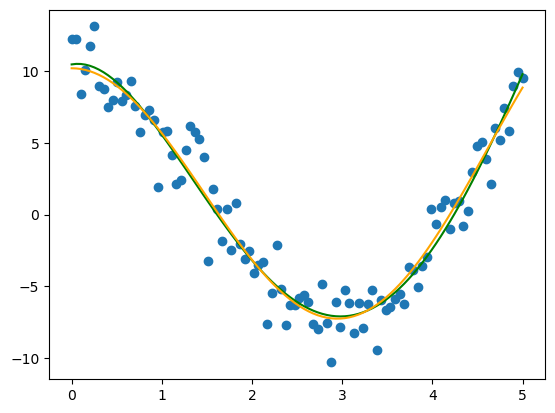

In [79]:
plt.plot(x, answer_poly, c="g")
plt.plot(x, func1(x), c="orange" )
plt.scatter(x,y)
plt.show()

In [61]:
def generate_func(x):
    return  np.array([1, x, np.sin(x), np.cos(x)])

def funcfit_custom(x, y):
    # Ensure x and y have the same length
    if len(x) != len(y):
        raise ValueError("Input arrays x and y must have the same length")

    A = np.array([generate_func(i) for i in x])
    # Solve the linear system of equations
    coefficients = lstsq(A, y)

    return coefficients

In [62]:
pdf= funcfit_custom(x,y)
pdf

array([-0.09899945,  1.04148484, -0.90131507, 10.39254727])

In [63]:
def from_funcfit(numbers,x):
    return generate_func(x) @numbers
        


In [64]:
answer_func = [from_funcfit(pdf,i) for i in x]


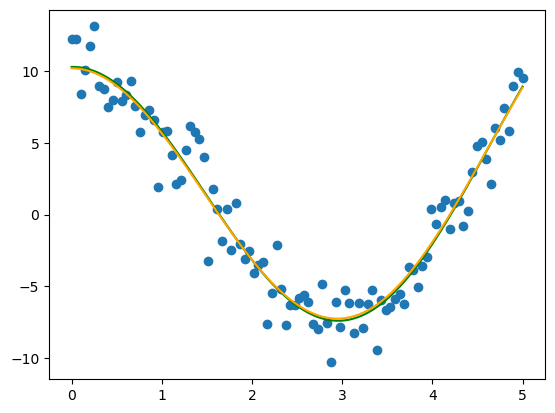

In [67]:
plt.plot(x, answer_func, c="g")
plt.plot(x, func1(x), c="orange" )
plt.scatter(x,y)
plt.show()